# <b> <font color = red> PROJECT NEURAL NETWORK

# <font color = Orange> PART ONE

<b> <font color = Blue> CONTEXT :</b>
<font color= Navy> A  communications  equipment  manufacturing  company  has  a  product  which  is  responsible  for  emitting  informative  signals.  Company  wants  to  build  a machine learning model which can help the company to predict the equipment’s signal quality using various parameters

<b> <font color = Blue>DATA DESCRIPTION : </b>
<font color = navy> The data set contains information on various signal tests performed:1.Parameters: Various measurable signal parameters.2.Signal_Quality: Final signal strength or quality

<b> <font color = blue> PROJECT OBJECTIVE :</b>
<font color = Navy> The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].

#### <font color = teal>**Importing Pakages**

In [1]:
import warnings
import tensorflow as tf
from tensorflow import keras 
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [157]:
missing_values = ["n/a", "na", "--","-"] 
import warnings
warnings.filterwarnings('ignore')
import numpy             as np
import pandas            as pd
pd.set_option('display.max_columns', 100)
import scipy.stats       as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix  
from tensorflow.keras.models import load_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import optimizers,regularizers

In [43]:
data = pd.read_csv(r'c:\Users\Gunjan\Downloads/Part- 1 - Signal.csv', na_values = missing_values)
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**DATA DESCRIPTION: The data set contains information on various signal tests performed:**

- 1.Parameters: Various measurable signal parameters

- 2.Signal_Quality: Final signal strength or quality

In [44]:
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### When mean and the meadian is compared we can see that the data is normally spread and skewness is almost negligible. 

In [45]:
print('Number of missing values across columns-\n', data.isnull().sum())

Number of missing values across columns-
 Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


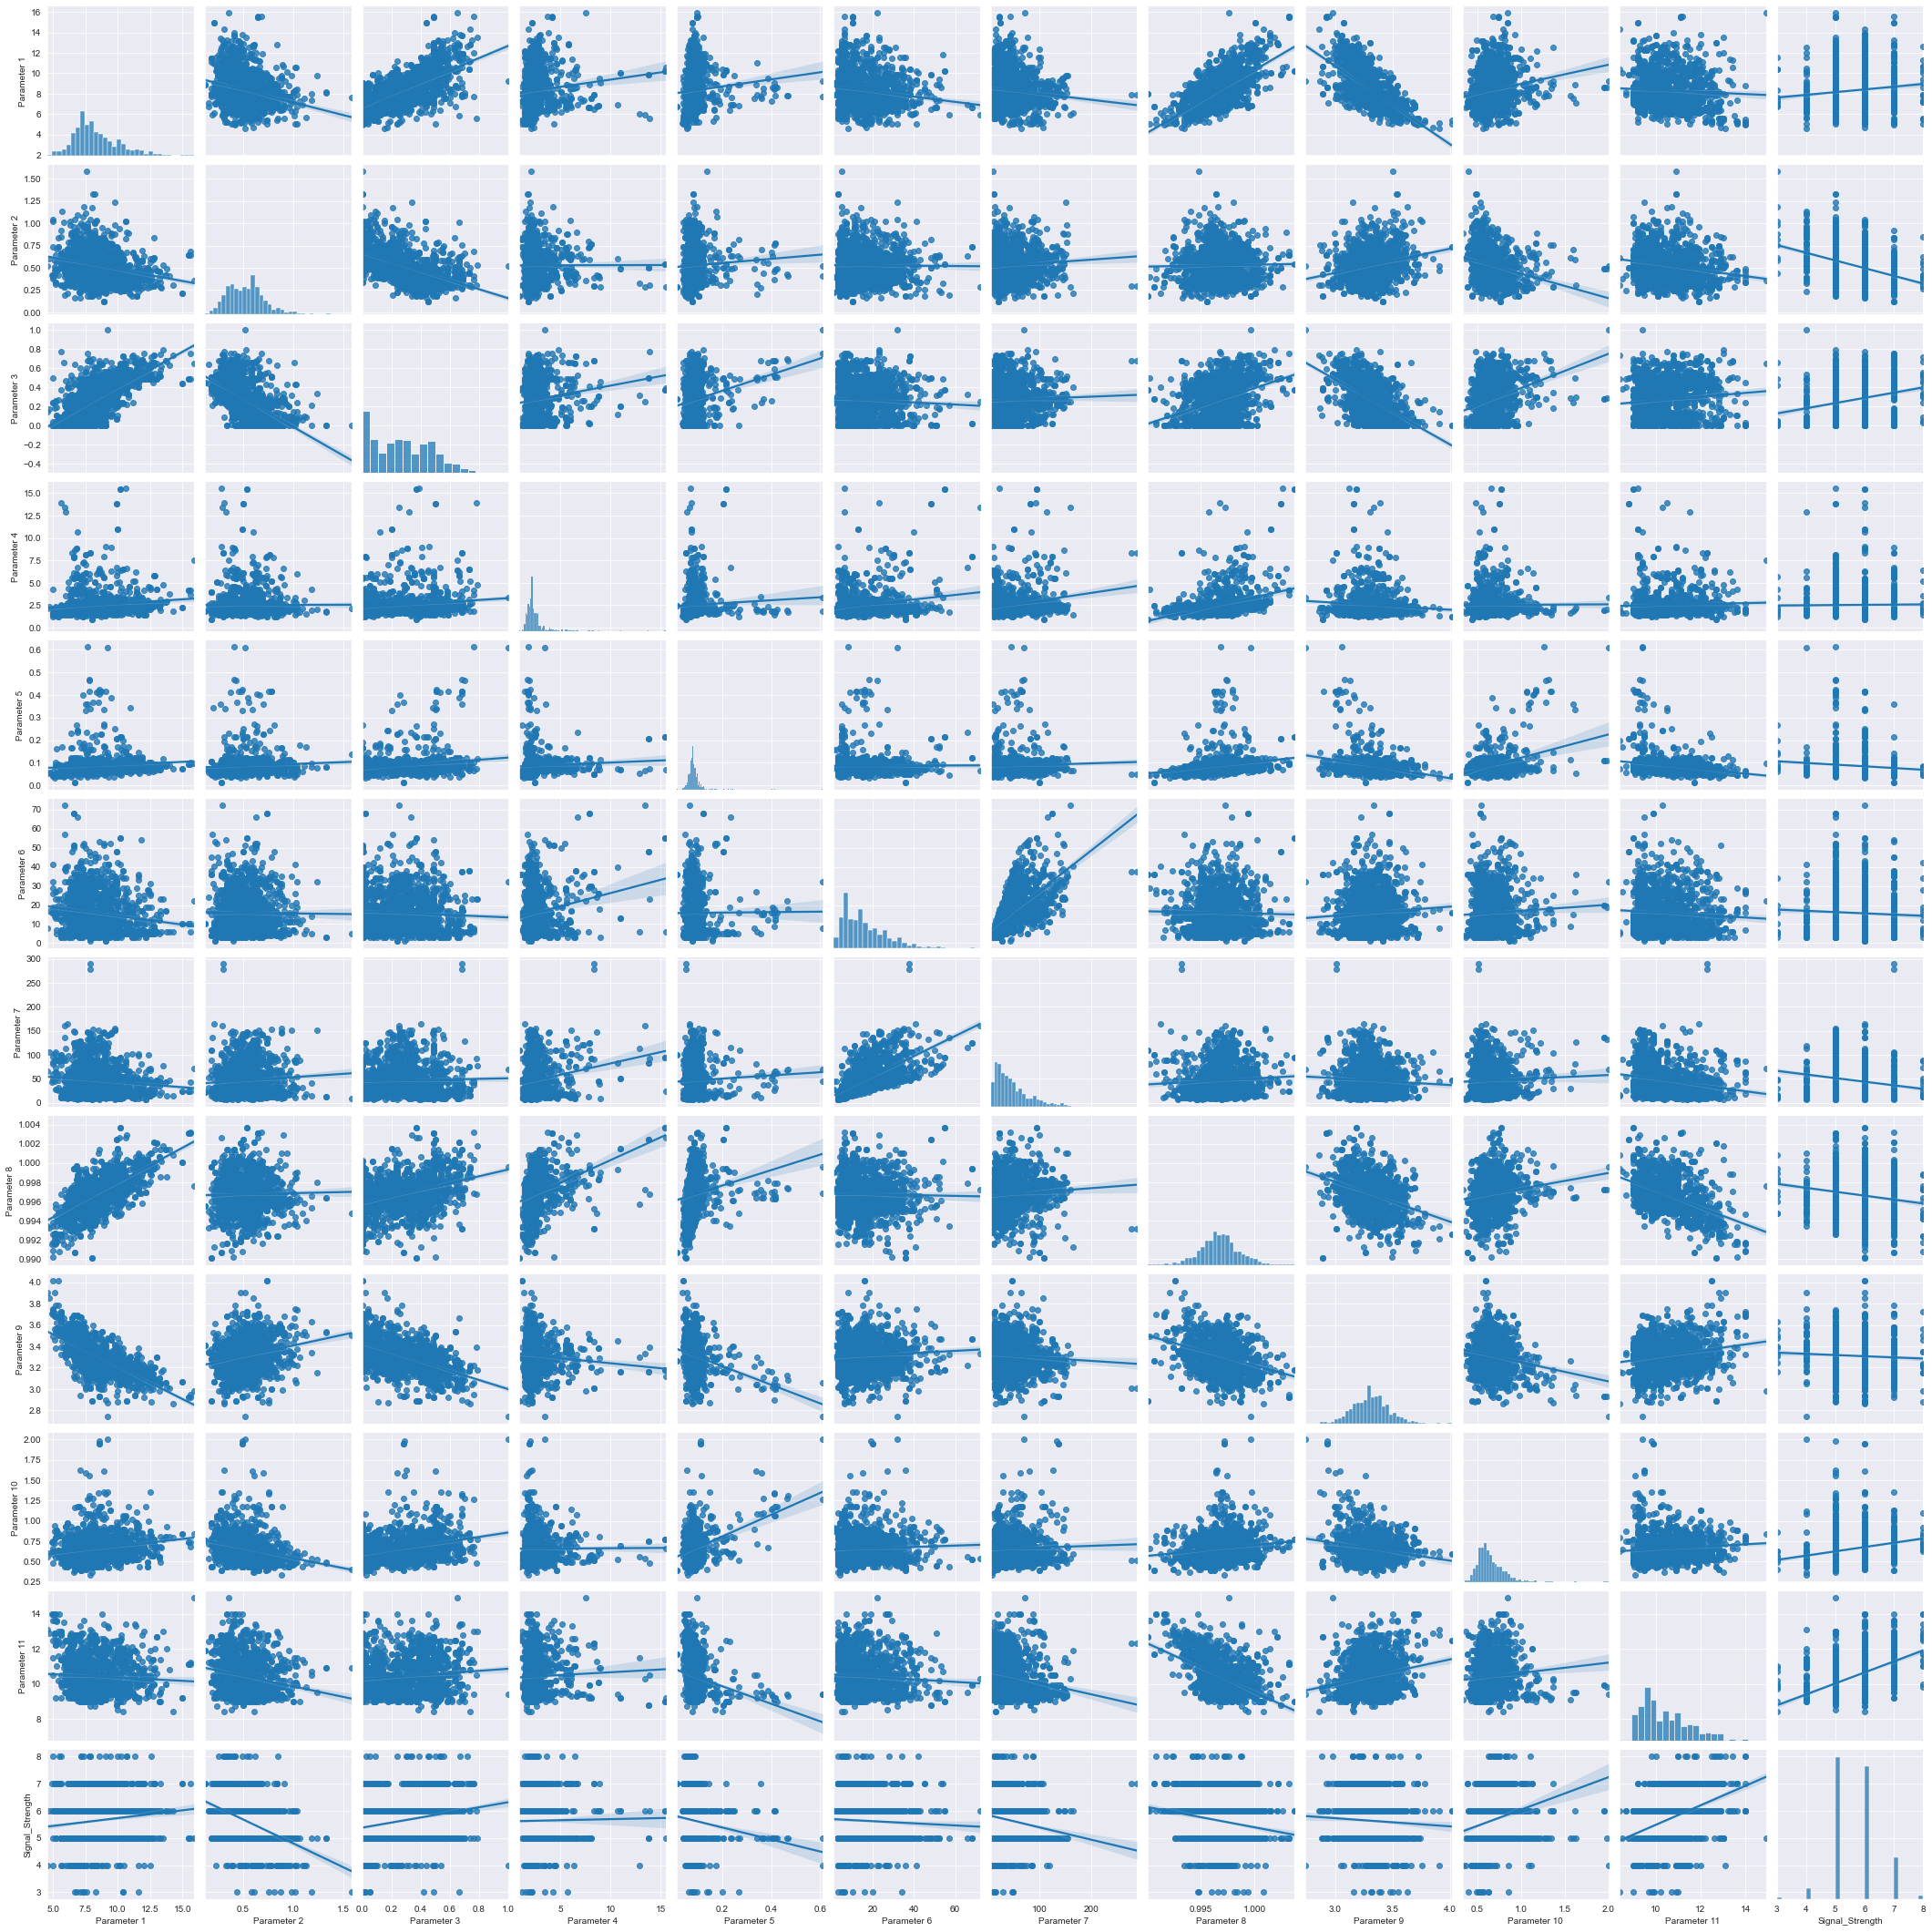

In [84]:
sns.pairplot(data, kind="reg")
plt.show()

In [46]:
dfc = data.corr()

In [47]:
dfc.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907


In [48]:
dfc[dfc<0] =0
print("New Array :")
dfc

New Array :


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,0.000000,0.671703,0.114777,0.093705,0.000000,0.000000,0.668047,0.000000,0.183006,0.000000,0.124052
Parameter 2,0.000000,1.000000,0.000000,0.001918,0.061298,0.000000,0.076470,0.022026,0.234937,0.000000,0.000000,0.000000
Parameter 3,0.671703,0.000000,1.000000,0.143577,0.203823,0.000000,0.035533,0.364947,0.000000,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,0.000000,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,0.000000,0.371260,0.000000,0.000000
Parameter 6,0.000000,0.000000,0.000000,0.187049,0.005562,1.000000,0.667666,0.000000,0.070377,0.051658,0.000000,0.000000
Parameter 7,0.000000,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,0.000000,0.042947,0.000000,0.000000
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,0.000000,0.071269,1.000000,0.000000,0.148506,0.000000,0.000000
Parameter 9,0.000000,0.234937,0.000000,0.000000,0.000000,0.070377,0.000000,0.000000,1.000000,0.000000,0.205633,0.000000
Parameter 10,0.183006,0.000000,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,0.000000,1.000000,0.093595,0.251397


<font color = teal> <b> Comparing the correalion and plotting a heatmap

<AxesSubplot:>

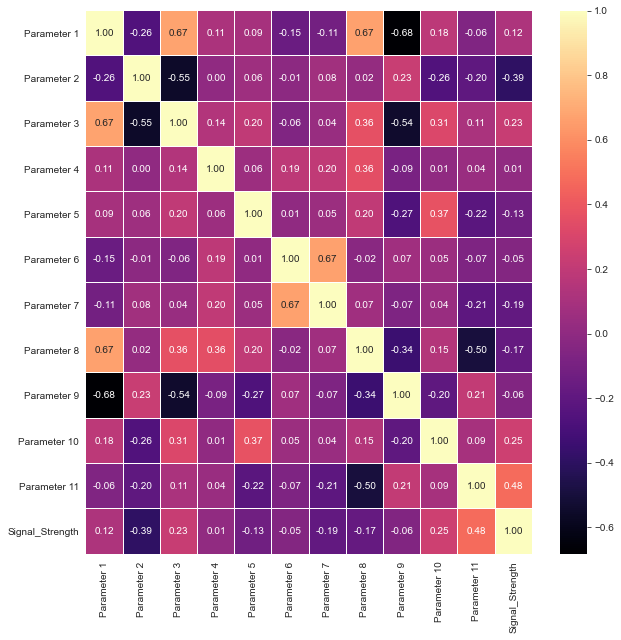

In [88]:
fig,ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") 

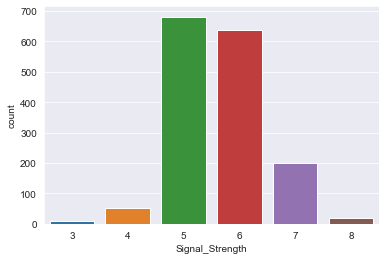

In [89]:
# Distibution of the column 'Signal_Strength'
sns.countplot(data['Signal_Strength'])    
plt.show()

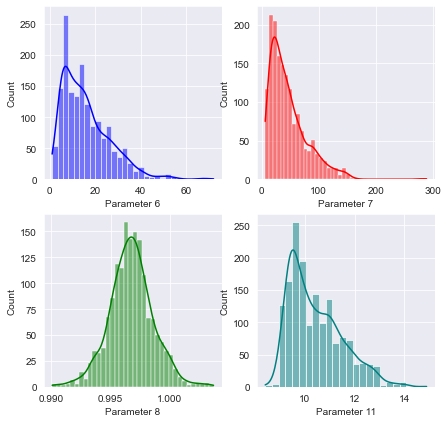

In [90]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=data, x="Parameter 6", kde=True, color="blue", ax=axs[0, 0])
sns.histplot(data=data, x="Parameter 7", kde=True, color="red", ax=axs[0, 1])
sns.histplot(data=data, x="Parameter 8", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=data, x="Parameter 11", kde=True, color="teal", ax=axs[1, 1])

plt.show()

<AxesSubplot:xlabel='Parameter 1', ylabel='Parameter 3'>

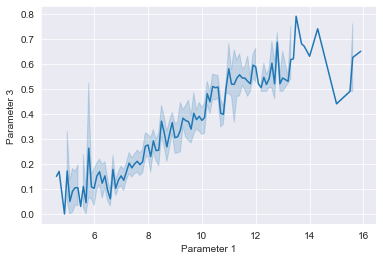

In [91]:
sns.set_style("darkgrid")
sns.lineplot(
    data=data, x="Parameter 1", y="Parameter 3", err_style="band")

<AxesSubplot:xlabel='Parameter 1', ylabel='Parameter 8'>

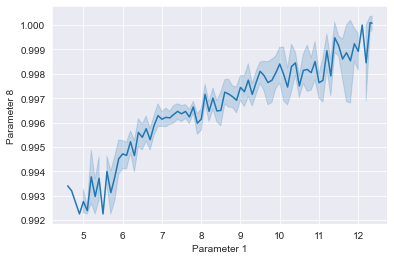

In [247]:
sns.set_style("darkgrid")
sns.lineplot(
    data=data, x="Parameter 1", y="Parameter 8", err_style="band")

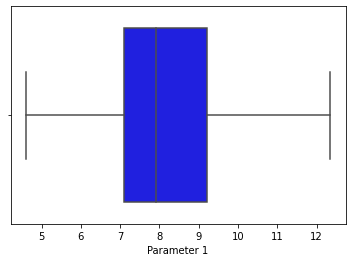

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
LowerWhisker, UpperWhisker :  3.95 , 12.349999999999998
Out of  1599  rows in data, number of outliers are: 0


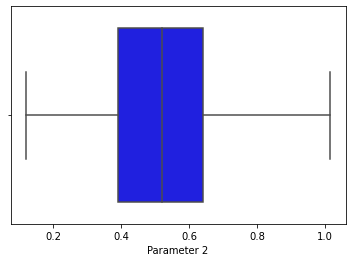

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
LowerWhisker, UpperWhisker :  0.015000000000000013 , 1.0150000000000001
Out of  1599  rows in data, number of outliers are: 0


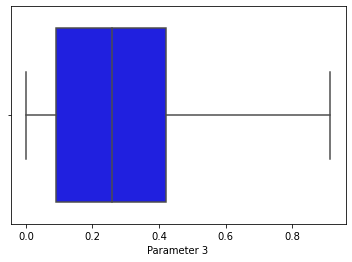

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.42
IQR is: 0.32999999999999996
LowerWhisker, UpperWhisker :  -0.4049999999999999 , 0.9149999999999999
Out of  1599  rows in data, number of outliers are: 0


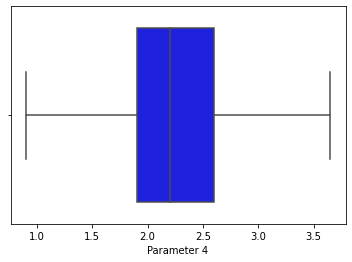

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
LowerWhisker, UpperWhisker :  0.8499999999999996 , 3.6500000000000004
Out of  1599  rows in data, number of outliers are: 0


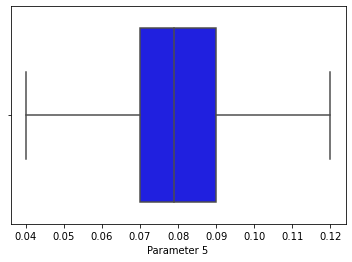

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.09
IQR is: 0.01999999999999999
LowerWhisker, UpperWhisker :  0.04000000000000002 , 0.11999999999999998
Out of  1599  rows in data, number of outliers are: 0


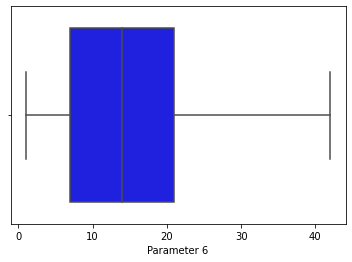

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
LowerWhisker, UpperWhisker :  -14.0 , 42.0
Out of  1599  rows in data, number of outliers are: 0


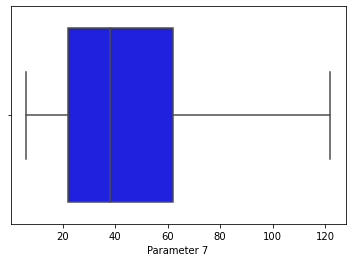

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  62.0
IQR is: 40.0
LowerWhisker, UpperWhisker :  -38.0 , 122.0
Out of  1599  rows in data, number of outliers are: 0


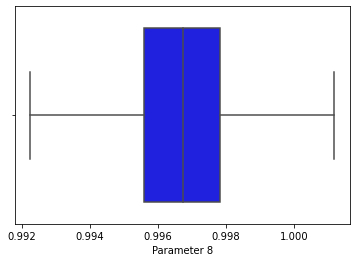

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.99675
Q3 is :  0.997835
IQR is: 0.002234999999999987
LowerWhisker, UpperWhisker :  0.9922475000000001 , 1.0011875
Out of  1599  rows in data, number of outliers are: 0


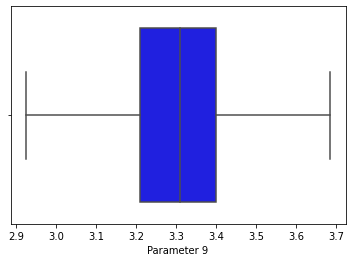

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
LowerWhisker, UpperWhisker :  2.925 , 3.6849999999999996
Out of  1599  rows in data, number of outliers are: 0


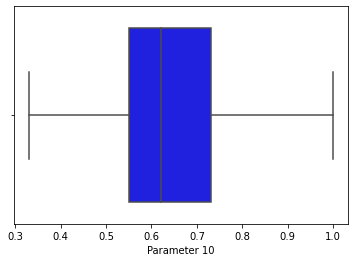

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
LowerWhisker, UpperWhisker :  0.28000000000000014 , 0.9999999999999999
Out of  1599  rows in data, number of outliers are: 0


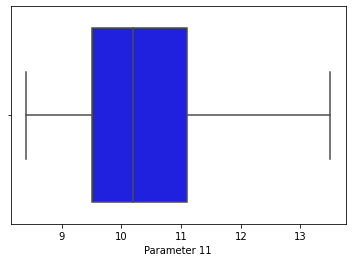

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
LowerWhisker, UpperWhisker :  7.1000000000000005 , 13.5
Out of  1599  rows in data, number of outliers are: 0


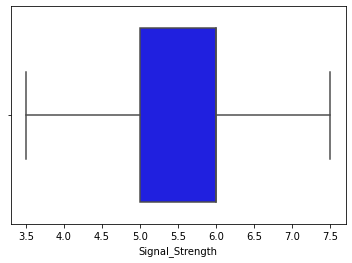

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
LowerWhisker, UpperWhisker :  3.5 , 7.5
Out of  1599  rows in data, number of outliers are: 0


In [51]:
# Checking the presence of outliers
l = len(data)
col = list(data.columns)
for i in np.arange(len(col)):
    sns.boxplot(x= data[col[i]], color='blue')
    plt.show()
    print('Boxplot of ',col[i])
    Q1 = data[col[i]].quantile(0.25)
    Q2 = data[col[i]].quantile(0.50)
    Q3 = data[col[i]].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('LowerWhisker, UpperWhisker : ',L_W,',',U_W)
    bools = (data[col[i]] < (Q1 - 1.5 *IQR)) |(data[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())

In [49]:
def detect_treate_outliers(df,operation):
    cols=[]
    IQR_list=[]
    lower_boundary_list=[]
    upper_boundary_list=[]
    outliers_count=[]
    for col in df.columns:
        #print('col',col)
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            #print('Inside if')
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            #print('Upper count=',up_cnt)
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            #print('lower count=',lw_cnt)
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
   #print('cols=',cols)
   # print('IQR_list=',IQR_list)
   # print('lower_boundary_list=',lower_boundary_list)
   # print('upper_boundary_list=',upper_boundary_list)
   # print('outliers_count=',outliers_count)
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    #print('Data=',ndf)
    #print('Columns having outliers=',cols)
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [50]:
count,df=detect_treate_outliers(data,'update')
if count>0:
    print('All clear')

All clear


#### <font color = teal>Parameter 9 and 3 are the paratmeters with the highest neative correlation, it can be considered that these paramerters will later will not be useful for predection, however we wil not drop the same as we do not want to lose the data. 
    
- We will further check the realation and the distrbution for the parameters with the best positive correlation.  
    
- We can also we can see that class 5.0 in 'Signal_Strength' has the highest count.

- Parameter 4 has the highest number of outliers which is 155.
    
- Also there are no outliers so we are ready for further analysis
   


<font color = teal> <b> We will Split the data into train and test set where we will drop the target column and use it further for Train and Test Split

In [52]:
X = data.drop("Signal_Strength", axis=1)
y = data['Signal_Strength']

In [53]:
# splitting into training and testing
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30)

In [54]:
X_vtrain.shape

(1119, 11)

In [55]:
# splitting to create training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_vtrain, y_vtrain, test_size=.20)

In [56]:
X_train.shape

(895, 11)

In [58]:
nn_reg = Sequential()

In [59]:
# Input Layer
#Adding Input layer and activation functions ReLU
nn_reg.add(Dense(10, kernel_initializer='he_normal',input_shape = (11, )))
#Adding BatchNormalization Layer
nn_reg.add(BatchNormalization())

#Hidden Layer 1
#Adding first Hidden layer
nn_reg.add(Dense(10, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
nn_reg.add(BatchNormalization())


#Hidden Layer 2
#Adding second Hidden layer
nn_reg.add(Dense(10, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
nn_reg.add(BatchNormalization())



In [60]:
nn_reg.compile(optimizer='sgd', loss='mse')

In [61]:
nn_reg.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100, batch_size=10,vrbose = 1)

Epoch 1/100
90/90 [==============================] - 2s 8ms/step - loss: 28.1226 - val_loss: 26.8653
Epoch 2/100
90/90 [==============================] - 1s 6ms/step - loss: 19.7259 - val_loss: 16.8338
Epoch 3/100
90/90 [==============================] - 1s 6ms/step - loss: 13.9153 - val_loss: 11.6646
Epoch 4/100
90/90 [==============================] - 1s 6ms/step - loss: 9.8685 - val_loss: 7.7182
Epoch 5/100
90/90 [==============================] - 1s 6ms/step - loss: 7.0529 - val_loss: 5.5779
Epoch 6/100
90/90 [==============================] - 0s 5ms/step - loss: 5.0829 - val_loss: 3.7631
Epoch 7/100
90/90 [==============================] - 1s 6ms/step - loss: 3.7100 - val_loss: 2.9000
Epoch 8/100
90/90 [==============================] - 1s 6ms/step - loss: 2.7525 - val_loss: 2.2519
Epoch 9/100
90/90 [==============================] - 1s 6ms/step - loss: 2.0799 - val_loss: 1.9026
Epoch 10/100
90/90 [==============================] - 1s 6ms/step - loss: 1.6143 - val_loss: 1.0501
Epo

In [71]:
y_pred = nn_reg.predict(X_test)

In [79]:
y_pred.reshape(480, 10)

array([[6.530444 , 6.525206 , 6.5231104, ..., 6.5011187, 6.523164 ,
        6.482876 ],
       [5.7318406, 5.5663705, 5.588728 , ..., 5.7301245, 5.5798097,
        5.6225343],
       [5.827803 , 5.8061132, 5.807592 , ..., 5.798083 , 5.8017135,
        5.8180256],
       ...,
       [6.3857946, 6.36222  , 6.413725 , ..., 6.2405515, 6.3195295,
        6.255601 ],
       [6.1451206, 6.064703 , 6.0878406, ..., 6.0556836, 6.0205364,
        6.01651  ],
       [5.711618 , 5.662857 , 5.6598573, ..., 5.650699 , 5.6360035,
        5.6254196]], dtype=float32)

In [64]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])

[6.530444  6.525206  6.5231104 6.6073256 6.5314326 6.530448  6.547453
 6.5011187 6.523164  6.482876 ]
[5.7318406 5.5663705 5.588728  5.8449426 5.576472  5.650007  5.6491847
 5.7301245 5.5798097 5.6225343]
[5.827803  5.8061132 5.807592  5.843054  5.7982264 5.803801  5.7972713
 5.798083  5.8017135 5.8180256]
[5.9618907 5.93267   5.927354  6.004773  5.910172  5.951168  5.930871
 5.969199  5.9529405 5.9738374]
[6.8841376 6.7978005 6.857359  6.9135733 6.8304977 6.8452463 6.835681
 6.8237615 6.7950997 6.7958   ]


In [65]:
print(y_test.head())

1286    6.0
253     5.0
101     6.0
1491    5.0
559     6.0
Name: Signal_Strength, dtype: float64


In [108]:
nn_reg.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 11)                44        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 12        
Total params: 56
Trainable params: 34
Non-trainable params: 22
_________________________________________________________________


In [77]:
Regression = nn_reg.evaluate(X_val, y_val)
print('Val_acc Accuracy : ', results[1])

7/7 [==============================] - 0s 3ms/step - loss: 0.5937
Val_acc Accuracy :  0.09950000047683716


#### <font color = Green> <b>Pickling The Model

In [109]:
# save the model
nn_reg.save("NNReg.rg")
print("it is in the Jar!")


INFO:tensorflow:Assets written to: NNReg.rg\assets
it is in the Jar!


In [110]:
# load the model
model_regl = load_model('NNReg.rg')

# <Font color = Orange>  PART TWO 

<b> <font color = Blue> Domain:</b>
<font color= Navy> Autonomous Vehicle

<b> <font color = Blue> BUSINESS  CONTEXT :</b>
<font color= Navy> A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example  of  a  corpus  of  such  street-level  photographs  is  Google’s  Street  View  imagery  composed  of  hundreds  of  millions  of  geo-located  360-degree  panoramic images. The  ability  to  automatically  transcribe  an  address  number  from  a  geo-located  patch  of  pixels  and  associate  the  transcribed  number  with  a  known  street  address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The  recognition  problem  is  further  complicated  by  environmental  factors  such  as  lighting,  shadows,  specularity,  and  occlusions  as  well  as  by  image  acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

<b> <font color = Blue> DATA  DESCRIPTION:</b>
<font color= Navy> The  SVHN  is  a  real-world  image  dataset  for  developing  machine  learning  and  object  recognition  algorithms  with  the  minimal  requirement  on data  formatting  but  comes  from  a  significantly  harder,  unsolved,  real-world  problem  (recognising  digits  and  numbers  in  natural  scene  images).  SVHN  is  obtained from house numbers in Google Street View images.Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.

<b> <font color = Blue> PROJECT OBJECTIVE:</b>
<font color= Navy> We will build a digit classifier on the SVHN (Street View Housing Number) dataset

In [71]:
import h5py

In [72]:
#loading the dataset 
data1 = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [73]:
data1.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [138]:
#Load the training, testing, and validation data
X_train=data1['X_train']
X_test=data1['X_test']
X_val=data1['X_val']
y_train=data1['y_train']
y_test=data1['y_test']
y_val=data1['y_val']

In [140]:
#Printing the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


#### <font color= teal> <b>DataVisualtioan 

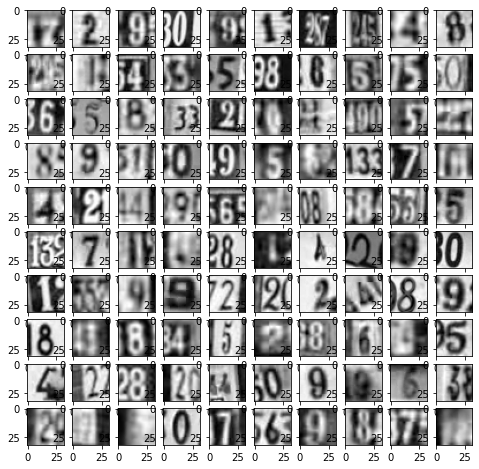

In [32]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

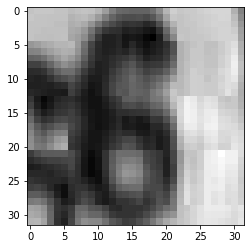

Label:  6


In [33]:
# show the number in the dataset
plt.imshow(X_train[20],cmap='gray')    
plt.show()
print('Label: ', y_train[20])

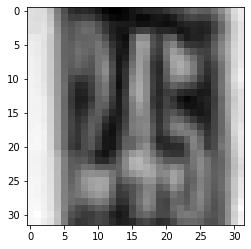

Label:  4


In [34]:
# show the number in the dataset
plt.imshow(X_test[8],cmap='gray')    
plt.show()
print('Label: ', y_test[8])



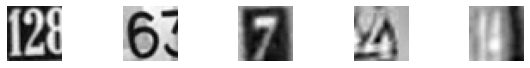

label for each of the above image: [2 6 7 4 4]


In [11]:
# visualizing the first 5 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:5]))

####  <font color = Green>  Implementing Deep Neural Network

In [142]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

#### <font color = teal> <b>Converting output label to multiple values

In [143]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [144]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [145]:
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

#### <font color = teal> <b>Train Test Split 

In [146]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


## <font color = Green> <b> Architecture Set Up

In [146]:
keras_model_1=Sequential()

In [147]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(600, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [148]:
keras_model_1.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 600)               615000    
_________________________________________________________________
batch_normalization_70 (Batc (None, 600)               2400      
_________________________________________________________________
activation_43 (Activation)   (None, 600)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 600)               360600    
_________________________________________________________________
batch_normalization_71 (Batc (None, 600)               2400      
_________________________________________________________________
activation_44 (Activation)   (None, 600)               0         
_________________________________________________________________
dense_143 (Dense)            (None, 600)             

In [149]:
#Setting the learning rate in adam
adam = optimizers.Adam(lr = 0.0001)
#Compile model
keras_model_1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [150]:
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 1000, epochs = 100, verbose = 0)

In [151]:
results_BN = keras_model_1.evaluate(X_val, y_val)
print('Val_acc using Batch ANN adam : ', results_BN[1])

1875/1875 [==============================] - 12s 6ms/step - loss: 0.3300 - accuracy: 0.9385
Val_acc using Batch ANN adam :  0.9384833574295044


In [152]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN'], 'accuracy': results_BN[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.938483


#### <font color = teal> <b>  Backpropagation Implementing

In [153]:
#Initialize the Neural Network Classifier
keras_model_2 = Sequential()

In [154]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(600, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_2.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_2.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_2.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_2.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [155]:
keras_model_2.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 600)               615000    
_________________________________________________________________
batch_normalization_75 (Batc (None, 600)               2400      
_________________________________________________________________
activation_49 (Activation)   (None, 600)               0         
_________________________________________________________________
dense_148 (Dense)            (None, 600)               360600    
_________________________________________________________________
batch_normalization_76 (Batc (None, 600)               2400      
_________________________________________________________________
activation_50 (Activation)   (None, 600)               0         
_________________________________________________________________
dense_149 (Dense)            (None, 600)             

In [156]:
#Setting the learning rate in adam
adam = optimizers.Adam(lr = 0.01)
# compiling the ANN classifier
keras_model_2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [157]:
BackpropNN = keras_model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 1000, epochs = 100, verbose = 0)

In [158]:
results_backprop = keras_model_2.evaluate(X_val, y_val)
print('Val_acc using BatchNorm Adam : ', results_backprop[1])

1875/1875 [==============================] - 9s 5ms/step - loss: 0.9816 - accuracy: 0.8235
Val_acc using BatchNorm Adam :  0.8235333561897278


In [159]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Adam'], 'accuracy': [results_backprop[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.938483
2,NN_Batch_Adam,0.823533


<font color = Purple> We would not try to find the best Lambda, Learning rate so that we can Tune the Model to a better accuracy. 

## <font color = green> <b> Train Test Loop Function

In [167]:
def train_and_test_loop(iterations, lr, Lambda, verb=False):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 1024
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    adam = optimizers.Adam(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 0)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

#### <font color = green> <b> Lambda, Learning Rate optimum rate cross validation

In [168]:
import math
for k in range(1,5):
    layers = 5
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Try 1/100: Best_val_acc: [0.4981319308280945, 0.8706190586090088], lr: 0.0007722864937371717, Lambda: 0.008339430651604918

Try 2/100: Best_val_acc: [0.3925574719905853, 0.883809506893158], lr: 0.0007688690236017405, Lambda: 0.0010576506895056677

Try 3/100: Best_val_acc: [0.42432618141174316, 0.8789047598838806], lr: 0.000686538056417775, Lambda: 0.002002928167319142

Try 4/100: Best_val_acc: [0.29073089361190796, 0.9484761953353882], lr: 0.0002947748807778232, Lambda: 0.009306327323978469



#### <font color = green> <b> Testing Learning Rate and Lambda

In [25]:
keras_model_LR = Sequential()

In [26]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_LR.add(Dense(600, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_LR.add(BatchNormalization())
#Adding Activation function
keras_model_LR.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_LR.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_LR.add(BatchNormalization())
#Adding Activation function
keras_model_LR.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_LR.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_LR.add(BatchNormalization())
#Adding Activation function
keras_model_LR.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_LR.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_LR.add(BatchNormalization())
#Adding Activation function
keras_model_LR.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_LR.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_LR.add(BatchNormalization())
#Adding Activation function
keras_model_LR.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_LR.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_LR.add(Activation('softmax'))

In [27]:
keras_model_LR.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 600)               615000    
_________________________________________________________________
batch_normalization_28 (Batc (None, 600)               2400      
_________________________________________________________________
activation (Activation)      (None, 600)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 600)               360600    
_________________________________________________________________
batch_normalization_29 (Batc (None, 600)               2400      
_________________________________________________________________
activation_1 (Activation)    (None, 600)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 600)              

In [32]:
#Setting the learning rate in adam
adam = optimizers.Adam(lr = 0.039)
# compiling the ANN classifier
keras_model_LR.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [33]:
# Fitting the NN to the Training data
learingRatetest = keras_model_LR.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 1000, epochs = 100, verbose =0)

In [34]:
learingRatetestresults = keras_model_LR.evaluate(X_val, y_val)
print('Val_acc using simple NN adam : ', learingRatetestresults[1])

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6725 - accuracy: 0.8826
Val_acc using simple NN adam :  0.8825500011444092


#### With Accuracy of 88%

In [35]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['With Learning Rate0.039 '], 'accuracy': learingRatetestresults[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,With Learning Rate0.039,0.88255


#### <font color = teal> <b> Tessting Dropout with batch normalization 
    
    Adding BatchNormalization Layer and Dropout Layer (0.5)

In [36]:
keras_model_drop = Sequential()

In [37]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_drop.add(Dense(500, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_drop.add(BatchNormalization())
#Adding Activation function
keras_model_drop.add(Activation('relu'))
#Adding Dropout Layer
keras_model_drop.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_drop.add(Dense(500,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_drop.add(BatchNormalization())
#Adding Activation function
keras_model_drop.add(Activation('relu'))
#Adding Dropout Layer
keras_model_drop.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_drop.add(Dense(500, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_drop.add(BatchNormalization())
#Adding Activation function
keras_model_drop.add(Activation('relu'))
#Adding Dropout Layer
keras_model_drop.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_drop.add(Dense(500, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_drop.add(BatchNormalization())
#Adding Activation function
keras_model_drop.add(Activation('relu'))
#Adding Dropout Layer
keras_model_drop.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_drop.add(Dense(500, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_drop.add(BatchNormalization())
#Adding Activation function
keras_model_drop.add(Activation('relu'))
#Adding Dropout Layer
keras_model_drop.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_drop.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_drop.add(Activation('softmax'))

In [38]:
keras_model_drop.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 500)               512500    
_________________________________________________________________
batch_normalization_33 (Batc (None, 500)               2000      
_________________________________________________________________
activation_6 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 500)               250500    
_________________________________________________________________
batch_normalization_34 (Batc (None, 500)               2000      
_________________________________________________________________
activation_7 (Activation)    (None, 500)              

In [39]:
#Setting the learning rate in adam
adam = optimizers.Adam(lr = 0.039)
# compiling the NN classifier
keras_model_drop.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [40]:
# Fitting the NN to the Training data
batchdrop = keras_model_drop.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 1000, epochs = 20, verbose = 0)

In [41]:
results_bndrop = keras_model_drop.evaluate(X_val, y_val)
print('Val_acc using BatchNormand Drop: ', results_bndrop[1])

1875/1875 [==============================] - 9s 5ms/step - loss: 2.3031 - accuracy: 0.1000
Val_acc using BatchNormand Drop:  0.10000000149011612


#### With Accuracy of 100% 

In [42]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results_bndrop[1]]},index={'2'})
results_on_val = pd.DataFrame({'Method':['BtachNorm and Dropout'], 'accuracy': results_bndrop[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,BtachNorm and Dropout,0.1


<Font color = Purple> <b> The accuracy is static as hence, we stopped the model from training as the model did not improve. We will not try with Combination of Learning Rate and Lambda to Find the best Accuracy. 

#### <font color = teal> <b> Modified Function

In [43]:
def Modelloop(iterations,layers,lr,Lambda, verb=False):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 500
    output_nodes = 10
    
    model = Sequential()
    print(" Model Sequencing in process..... ")
    print("                            ")
    model.add(Dense(hidden_nodes,input_shape=(1024,), activation='relu'))
    for i in range(layers):
        model.add(Dense(hidden_nodes,kernel_initializer='he_normal'))
        model.add(BatchNormalization())
        model.add(Dense(hidden_nodes, activation='relu'))
        print("Model with "+str(i+1)+" layers")
        print("Layer added Successfully")
        print("                         ")
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    adam = optimizers.Adam(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    # Fit the model
    print("Fitting the Model......")
    print(".......................")
    print("  ")
    history = model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 0)
    
    score = model.evaluate(X_train, y_train, verbose=1)
    
    print(" Model Compiled calculating Accuracy... ")
    
    results = model.evaluate(X_val, y_val)
    
    print('Accuracy on Validation Set is : ', results[0])
    
#list all data in history
    print("           ")
    print(history.history.keys())

In [44]:
iterations=100
layers=4
lr= 0.001
Lambda=0.0024
Modelloop(iterations,layers,lr,Lambda)

 Model Sequencing in process..... 
                            
Model with 1 layers
Layer added Successfully
                         
Model with 2 layers
Layer added Successfully
                         
Model with 3 layers
Layer added Successfully
                         
Model with 4 layers
Layer added Successfully
                         
Fitting the Model......
.......................
  
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4168 - accuracy: 0.9052
 Model Compiled calculating Accuracy... 
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6759 - accuracy: 0.8714
Accuracy on Validation Set is :  0.6759143471717834
           
dict_keys(['loss', 'accuracy'])


##### <Font color = Blue> The accuracy is Very Low, hence, we will try with a Different Learning Rate and lambda

In [47]:
iterations=100
layers=4
lr=0.001
Lambda=0.0090
Modelloop(iterations,layers,lr,Lambda)

 Model Sequencing in process..... 
                            
Model with 1 layers
Layer added Successfully
                         
Model with 2 layers
Layer added Successfully
                         
Model with 3 layers
Layer added Successfully
                         
Model with 4 layers
Layer added Successfully
                         
Fitting the Model......
.......................
  
1313/1313 [==============================] - 7s 6ms/step - loss: 0.3118 - accuracy: 0.9192
 Model Compiled calculating Accuracy... 
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5471 - accuracy: 0.8836
Accuracy on Validation Set is :  0.547112762928009
           
dict_keys(['loss', 'accuracy'])


In [48]:
iterations=100
layers=4
lr=0.001
Lambda=0.0048
Modelloop(iterations,layers,lr,Lambda)

 Model Sequencing in process..... 
                            
Model with 1 layers
Layer added Successfully
                         
Model with 2 layers
Layer added Successfully
                         
Model with 3 layers
Layer added Successfully
                         
Model with 4 layers
Layer added Successfully
                         
Fitting the Model......
.......................
  
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4232 - accuracy: 0.8972
 Model Compiled calculating Accuracy... 
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6858 - accuracy: 0.8646
Accuracy on Validation Set is :  0.6858246326446533
           
dict_keys(['loss', 'accuracy'])


In [49]:
iterations=100
layers=4
lr=0.01
Lambda=0.048
Modelloop(iterations,layers,lr,Lambda)

 Model Sequencing in process..... 
                            
Model with 1 layers
Layer added Successfully
                         
Model with 2 layers
Layer added Successfully
                         
Model with 3 layers
Layer added Successfully
                         
Model with 4 layers
Layer added Successfully
                         
Fitting the Model......
.......................
  
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3510 - accuracy: 0.9065
 Model Compiled calculating Accuracy... 
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5323 - accuracy: 0.8765
Accuracy on Validation Set is :  0.5323423147201538
           
dict_keys(['loss', 'accuracy'])


#### <Font color = Blue><b> Final Model 
    
 
 <font color = Teal>
     
- <b> Learning Rate = 0.001
     
- <b> Lambda = 0.0048

In [88]:
##Initialize the Neural Network Classifier
keras_model_final = Sequential()

In [89]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_final.add(Dense(600, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_final.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_final.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_final.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_final.add(Dense(600, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_final.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.0048)))

In [90]:
keras_model_final.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 600)               615000    
_________________________________________________________________
batch_normalization_72 (Batc (None, 600)               2400      
_________________________________________________________________
activation_22 (Activation)   (None, 600)               0         
_________________________________________________________________
dense_155 (Dense)            (None, 600)               360600    
_________________________________________________________________
batch_normalization_73 (Batc (None, 600)               2400      
_________________________________________________________________
activation_23 (Activation)   (None, 600)               0         
_________________________________________________________________
dense_156 (Dense)            (None, 600)             

In [113]:
#Setting the learning rate in adam
adam = optimizers.Adam(lr = 0.01)
# compiling the NN classifier
keras_model_final.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [172]:
final = keras_model_final.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 1000, epochs = 100, verbose = 0)

In [179]:
results_final = keras_model_final.evaluate(X_test, y_test)
print('Test accuracy : ', results_final[1])

563/563 [==============================] - 3s 6ms/step - loss: 0.5988 - accuracy: 0.8668
Test accuracy :  0.8668333292007446


In [181]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results_final[1]]},index={'2'})
results_on_val = pd.DataFrame({'Method':['Final Model'], 'accuracy': results_final[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,Final Model,0.866833


## <font color = teal> <b> Prediction for the digits using NN classifier on Test data

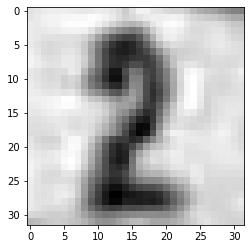

In [186]:
#Showing the image
plt.imshow(X_test[2].reshape(32,32),cmap='gray')

#### Prediction with Final Model

In [188]:
np.argmax(keras_model_final.predict(X_test)[2], axis=-1)

2

In [189]:
np.argmax(keras_model_drop.predict(X_test)[2], axis=-1)

8

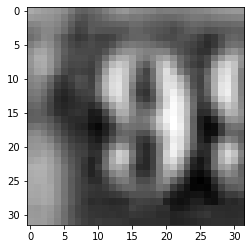

In [190]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')

#### Prediction with the model with BatchNorm and Drop

In [191]:
np.argmax(keras_model_drop.predict(X_test)[5], axis=-1)

8

In [192]:
np.argmax(keras_model_final.predict(X_test)[5], axis=-1)

9

## <Font Color = Red> <b> Summary

 #### <font color = orange>We Tried with Number of Lambda and Learning Rates while we can see that the accuracy dropped as we changed the same, The Model "keras_model_drop" is built on </font>
 
 
<font color= blue>
    - input layer
    - 4 hidden layers
    - output layer with Softmax function </font>
    
    
    -While we have used learning rate 0.039 and adam as optimizer for the same
    -We included a drop out factor of (0.5), this gave us an accuracy of 100 % on validation set with 20 Epochs.
    
##### <font color= teal> However, "keras_model_drop" model is not recommended for Production as it looks like an overfit model it it is not giving us correct predictions.
    
    
 <font color = red> We shall go with our final model i.e keras_model_final, which gives us correct Prediction and has an accuracy score of 86%. 

#### <font color = Green> <b>Pickling The Model

In [193]:
# save the model
keras_model_final.save("SVHNFinal.cl")
print("it is in the Jar!")

INFO:tensorflow:Assets written to: SVHNFinal.cl\assets
it is in the Jar!


In [194]:
# load the model
#model_regl = load_model('SVHNFinal.cl')